<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
#데이터를 훈련세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state = 42)

#훈련세트와 테스트세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
#K-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]])) #50cm 농어의 무게를 1033.33 정도로 예측함

[1033.33333333]


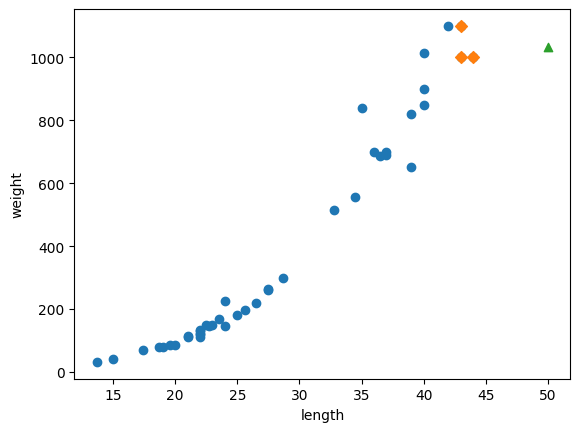

In [ ]:
#kneighbors()메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있음
import matplotlib.pyplot as plt
#50cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[50]])
#훈련세트의 산점도를 그린다
plt.scatter(train_input, train_target)
#훈련세트 중 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
#50cm 농어 데이터
plt.scatter(50,1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

50cm 농어에서 가장 가까운 것은 45cm 근방이기에 근처 3개 샘플들의 무게 평균이 계산된 것

In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
#선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#선형회귀 모델을 훈련
lr.fit(train_input,train_target)
#50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
#lr 객체의 coef_와 intercept_는 y=ax+b에서 각각 a와 b를 나타냄
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


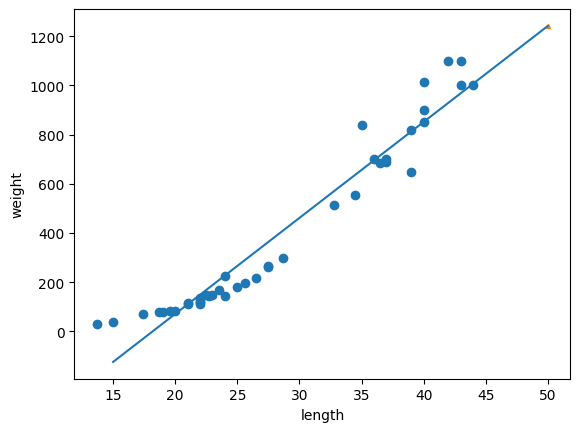

In [ ]:
#훈련세트의 산점도를 그린다.
plt.scatter(train_input, train_target)
#15에서 50까지 1차 방정식 그래프를 그린다.
plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
#50cm 농어데이터
plt.scatter(50, 1241,8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#훈련세트와 테스트 세트에 대한 R^2 점수 (결정계수점수)
print(lr.score(train_input, train_target)) #훈련세트
print(lr.score(test_input, test_target)) #테스트세트

0.939846333997604
0.8247503123313558


In [ ]:
#0g이하까지 선이 있는 일직선 아닌 최적의 곡선(2차방정식) 길이를 제곱한 항이 훈련세트에 추가되어야함 >column_stack()함수를 사용하면 간단
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
#train_poly를 사용한 선형 회귀모델
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [ ]:
#훈련한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827
